In [5]:
'''
______Author______
Nazanin MohammadRezaii-9733068

___ COURSE ___
Digital Image processing

_____Homework______
HW3_question 4

_____Intro_______
At first we practice bit plane slicing on img:image of an electrical board
then we use that knowledge to apply bit plane slicing on three images of a seashore taken by NASA
and perform motion detection on them

_____Result_______
As we see there are more white points in the image referring to the difference of (img2,img3) meaning that 
more movement detected from img2 to img3

'''

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

###################### Design bit plane slicing function #####################

def bitplane_slice(image,n):
    row,col = image.shape
    temp_plane = np.ones((row,col))*(2**n)
    temp_plane = temp_plane.astype(np.uint8)
    nth_plane = cv.bitwise_and(temp_plane,image)
    nth_plane = nth_plane*255   

    return nth_plane


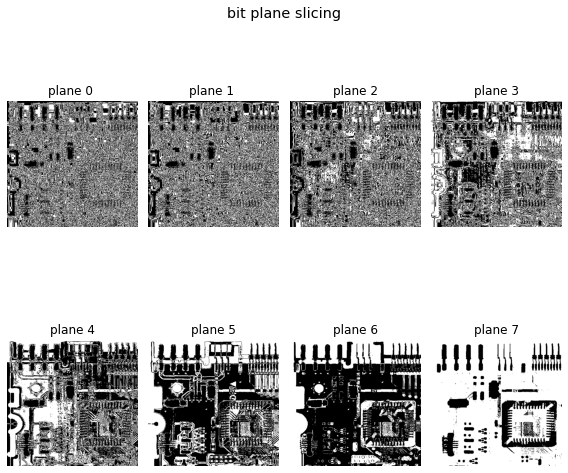

In [6]:
##################### Bit plane slicing on our image #######################

# read the image
img = cv.imread("PCB.tif", 0)

# bitplanes of the image
plane0 = bitplane_slice(img,0)
plane1 = bitplane_slice(img,1)
plane2 = bitplane_slice(img,2)
plane3 = bitplane_slice(img,3)
plane4 = bitplane_slice(img,4)
plane5 = bitplane_slice(img,5)
plane6 = bitplane_slice(img,6)
plane7 = bitplane_slice(img,7)

# plot 7 planes of the image
plt.figure(figsize=(8,8))
plt.suptitle('bit plane slicing',fontsize='x-large')

plt.subplot(2,4,1)
plt.imshow(plane0,cmap='gray')
plt.title('plane 0 ')
plt.axis(False)

plt.subplot(2,4,2)
plt.imshow(plane1,cmap='gray')
plt.title('plane 1 ')
plt.axis(False)

plt.subplot(2,4,3)
plt.imshow(plane2,cmap='gray')
plt.title('plane 2')
plt.axis(False)

plt.subplot(2,4,4)
plt.imshow(plane3,cmap='gray')
plt.title('plane 3')
plt.axis(False)

plt.subplot(2,4,5)
plt.imshow(plane4,cmap='gray')
plt.title('plane 4')
plt.axis(False)

plt.subplot(2,4,6)
plt.imshow(plane5,cmap='gray')
plt.title('plane 5')
plt.axis(False)

plt.subplot(2,4,7)
plt.imshow(plane6,cmap='gray')
plt.title('plane 6')
plt.axis(False)

plt.subplot(2,4,8)
plt.imshow(plane7,cmap='gray')
plt.title('plane 7')
plt.axis(False)

plt.tight_layout()
plt.show()

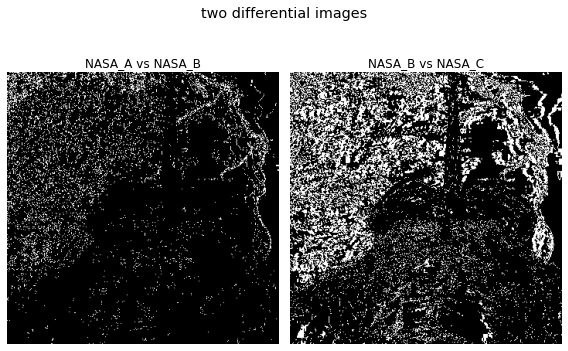

In [7]:
##################### Design a motion detector ######################

# read 3 images
img1 = cv.imread('NASA-A.tif',0)
img2 = cv.imread('NASA-B.tif',0)
img3 = cv.imread('NASA-C.tif',0)

# planes of image NASA_A
plane7_img1=bitplane_slice(img1,7)
plane6_img1=bitplane_slice(img1,6)
plane5_img1=bitplane_slice(img1,5)
plane4_img1=bitplane_slice(img1,4)

# planes of image NASA_B
plane7_img2=bitplane_slice(img2,7)
plane6_img2=bitplane_slice(img2,6)
plane5_img2=bitplane_slice(img2,5)
plane4_img2=bitplane_slice(img2,4)

# planes of image NASA_C
plane7_img3=bitplane_slice(img3,7)
plane6_img3=bitplane_slice(img3,6)
plane5_img3=bitplane_slice(img3,5)
plane4_img3=bitplane_slice(img3,4)

# img1 VS img2 (the difference of images reffer to movement of objects)
a7 = cv.bitwise_xor(plane7_img1,plane7_img2)
a6 = cv.bitwise_xor(plane6_img1,plane6_img2)
a5 = cv.bitwise_xor(plane5_img1,plane5_img2)
a4 = cv.bitwise_xor(plane4_img1,plane4_img2)
op1=np.array(128*a7+64*a6+32*a5+31*a4)

# img2 Vs img3 (the difference of images reffer to movement of objects)
b7 = cv.bitwise_xor(plane7_img3,plane7_img2)
b6 = cv.bitwise_xor(plane6_img3,plane6_img2)
b5 = cv.bitwise_xor(plane5_img3,plane5_img2)
b4 = cv.bitwise_xor(plane4_img3,plane4_img2)
op2=np.array(128*b7+64*b6+32*b5+31*b4)

plt.figure(figsize=(8,8))
plt.suptitle('two differential images',fontsize='x-large',y=0.85)

plt.subplot(1,2,1)
plt.imshow(op1,cmap='gray')
plt.title('NASA_A vs NASA_B')
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(op2,cmap='gray')
plt.title('NASA_B vs NASA_C')
plt.axis(False)

plt.tight_layout()
plt.show()